Pada Tugas kali ini kita akan membuat 4 function yang memiliki fungsinya masing-masing.
Data yang diambil berasal dari berkas imdb_movie_dumpfile.sql
Silahkan import dumpfile tersebut dengan menggunakan terminal/cmd.

Jika ada proses yang dilakukan boleh dilakukan dari query sql, atau menggunakan python setelah semua data ditampilkan menggunakan sql. 

In [59]:
#Taruh semua library/package dsini
from mysql.connector import connect
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Pada sel ini peserta diminta untuk melakukan koneksi terhadap database.
with open("db.json") as f:
    creds = json.load(f)

user = creds.get('user')
password = creds.get('password')
database = creds.get('database')


In [41]:
db = connect(
    host = "localhost",
    user = user,
    password = password,
    database = database

)

1. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 5 direktur dengan jumlah film terbanyak dalam daftar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 5.

In [42]:
def most_maker_director():
    query = '''
    SELECT director_name, count(director_name) as win from movies
    GROUP BY director_name
    ORDER BY win DESC
    limit 5
    '''

    cursor_db = db.cursor()
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    for index in range(len(data)):
        print(f"{index+1}. {data[index][0]}")



2. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 10 direktur dengan total jumlah pendapatan terbesar untuk semua film yang dia buat. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 10 beserta total pendapatan dari masing-masing direktur.

Pendapatan bisa didapatkan dari nilai gross

In [49]:
def most_profitable_director():
    query= '''
        SELECT director_name, sum(gross) as profit
        from movies
        GROUP BY director_name
        ORDER BY profit DESC
        limit 10;
    '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    for index in range(len(data)):
        print(f"{index+1}. {data[index][0]} - {data[index][1]:,.2f}")

3. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 15 film dengan pendapatan terbesar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 15 beserta pendapatan dari masing-masing film

In [54]:
def most_profitable_movie():
    query = '''
        SELECT distinct(movie_title),title_year, gross
        from movies
        order by gross desc
        limit 15;
        '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    data = cursor_db.fetchall()
    for index in range(len(data)):
        print(f"{index+1}.{data[index][0]}({int(data[index][1])}) - {data[index][2]:,.2f}")
    

4. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan plot distribusi budget dari semua film pada tahun yang ditentukan. fungsi ini memiliki input, yaitu adalah tahun.

In [60]:
def budget_distribution(year):
    query = f'''
        select budget 
        from movies
        where budget is not null
        and title_year= {year}
        '''
    cursor_db = db.cursor()
    cursor_db.execute(query)
    data = cursor_db.fetchall()

    list_data = [int(row[0]) for row in data]
    sns.histplot(
        list_data,
        kde=True,
        bins= int(20),
        color = 'blue'
    )
    plt.title = f"Movie Budget in {year}"
    plt.xlabel= 'budget'
    plt.ylabel= 'count'
    plt.show()

Semua sel di bawah digunakan untuk pemanggilan fungsi dan menunjukan hasil yang diharapkan.

In [45]:
most_maker_director()

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott


In [50]:
most_profitable_director()


1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Joss Whedon - 1,730,886,628.00
10. Robert Zemeckis - 1,619,309,108.00


In [55]:
most_profitable_movie()

1.Avatar (2009) - 760,505,847.00
2.Titanic (1997) - 658,672,302.00
3.Jurassic World (2015) - 652,177,271.00
4.The Avengers (2012) - 623,279,547.00
5.The Dark Knight (2008) - 533,316,061.00
6.Star Wars: Episode I - The Phantom Menace (1999) - 474,544,677.00
7.Star Wars: Episode IV - A New Hope (1977) - 460,935,665.00
8.Avengers: Age of Ultron (2015) - 458,991,599.00
9.The Dark Knight Rises (2012) - 448,130,642.00
10.Shrek 2 (2004) - 436,471,036.00
11.E.T. the Extra-Terrestrial (1982) - 434,949,459.00
12.The Hunger Games: Catching Fire (2013) - 424,645,577.00
13.Pirates of the Caribbean: Dead Man's Chest (2006) - 423,032,628.00
14.The Lion King (1994) - 422,783,777.00
15.Toy Story 3 (2010) - 414,984,497.00


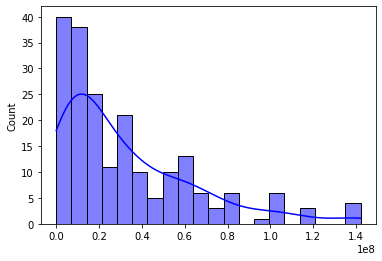

In [62]:
year = 2002
budget_distribution(year)
